# PyFri Jan 4 2019

In [1]:
import pathlib

In [4]:
raw =! jrnl @weight 

In [5]:
raw

['2017-04-11 10:55 76.8 kg \x1b@weight\x1b',
 '',
 '2017-04-14 23:10 \x1b@weight\x1b: 76.6 kg',
 '',
 '2018-11-24 14:42 79.4 kg \x1b@weight\x1b',
 '',
 '2018-11-26 08:48 78.1 kg \x1b@weight\x1b',
 '',
 '2018-11-27 18:41 77.4 kg \x1b@weight\x1b',
 '',
 '2018-11-28 09:00 77.6 kg \x1b@weight\x1b',
 '',
 '2018-11-29 13:46 \x1b@weight\x1b: 78.8 kg',
 '',
 '2018-12-01 11:35 78.2 kg \x1b@weight\x1b',
 '',
 '2018-12-02 15:53 77.8 kg \x1b@weight\x1b',
 '',
 '2018-12-04 19:47 78.5 kg \x1b@weight\x1b',
 '',
 '2018-12-05 21:12 77.8 kg \x1b@weight\x1b',
 '',
 '2018-12-06 22:30 \x1b@weight\x1b 77.2 kg',
 '',
 '2018-12-07 22:48 \x1b@weight\x1b 77.5 kg',
 '',
 '2018-12-09 01:06 \x1b@weight\x1b 79.2 kg',
 '',
 '2018-12-09 23:11 \x1b@weight\x1b 78.9 kg',
 '',
 '2018-12-16 19:48 77.2 kg \x1b@weight\x1b',
 '',
 '2018-12-17 23:57 \x1b@weight\x1b 76.5 kg',
 '',
 '2018-12-19 22:46 \x1b@weight\x1b 78.1 kg',
 '',
 '2018-12-21 00:01 \x1b@weight\x1b 77.6 kg',
 '',
 '2018-12-22 21:18 \x1b@weight\x1b 78.1 kg',
 ''

In [6]:
nonempty = [row for row in raw if row]

In [8]:
import re

In [9]:
re.search('\d\d\.\d', '2018-11-27 18:41 77.4 kg \x1b[36m@weight\x1b[39m')

<_sre.SRE_Match object; span=(17, 21), match='77.4'>

In [25]:
import datetime

In [33]:
result = {}
for row in nonempty:
    dt = row.split()[0]
    dt = datetime.datetime.strptime(dt, '%Y-%m-%d')
    kg = float(re.search('\d\d\.\d', row).group(0))
    result[dt] = kg

In [34]:
result

{datetime.datetime(2017, 4, 11, 0, 0): 76.8,
 datetime.datetime(2017, 4, 14, 0, 0): 76.6,
 datetime.datetime(2018, 11, 24, 0, 0): 79.4,
 datetime.datetime(2018, 11, 26, 0, 0): 78.1,
 datetime.datetime(2018, 11, 27, 0, 0): 77.4,
 datetime.datetime(2018, 11, 28, 0, 0): 77.6,
 datetime.datetime(2018, 11, 29, 0, 0): 78.8,
 datetime.datetime(2018, 12, 1, 0, 0): 78.2,
 datetime.datetime(2018, 12, 2, 0, 0): 77.8,
 datetime.datetime(2018, 12, 4, 0, 0): 78.5,
 datetime.datetime(2018, 12, 5, 0, 0): 77.8,
 datetime.datetime(2018, 12, 6, 0, 0): 77.2,
 datetime.datetime(2018, 12, 7, 0, 0): 77.5,
 datetime.datetime(2018, 12, 9, 0, 0): 78.9,
 datetime.datetime(2018, 12, 16, 0, 0): 77.2,
 datetime.datetime(2018, 12, 17, 0, 0): 76.5,
 datetime.datetime(2018, 12, 19, 0, 0): 78.1,
 datetime.datetime(2018, 12, 21, 0, 0): 77.6,
 datetime.datetime(2018, 12, 22, 0, 0): 78.1,
 datetime.datetime(2018, 12, 27, 0, 0): 77.8,
 datetime.datetime(2018, 12, 30, 0, 0): 76.9,
 datetime.datetime(2018, 12, 31, 0, 0): 78.

In [35]:
%matplotlib inline

In [36]:
import pandas as pd

In [39]:
ser = pd.Series(result)

In [40]:
ser

2017-04-11    76.8
2017-04-14    76.6
2018-11-24    79.4
2018-11-26    78.1
2018-11-27    77.4
2018-11-28    77.6
2018-11-29    78.8
2018-12-01    78.2
2018-12-02    77.8
2018-12-04    78.5
2018-12-05    77.8
2018-12-06    77.2
2018-12-07    77.5
2018-12-09    78.9
2018-12-16    77.2
2018-12-17    76.5
2018-12-19    78.1
2018-12-21    77.6
2018-12-22    78.1
2018-12-27    77.8
2018-12-30    76.9
2018-12-31    78.2
2019-01-01    77.7
2019-01-03    77.6
dtype: float64

In [42]:
ser2 = ser[2:]

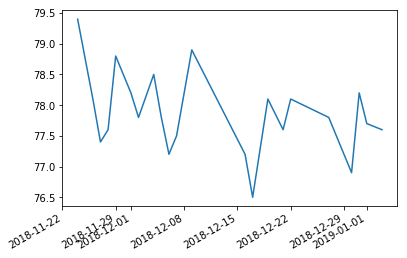

In [43]:
ser2.plot()

In [44]:
ser2.describe()

count    22.000000
mean     77.859091
std       0.668088
min      76.500000
25%      77.525000
50%      77.800000
75%      78.175000
max      79.400000
dtype: float64